# Lei de Benford
Também chamada de lei do primeiro dígito, lei de Newcomb-Benford e lei números anômalos refere-se à distribuição de dígitos em várias fontes de casos reais. Ao contrário da homogeneidade esperada, a lei afirma que em muitas coleções de números que ocorrem naturalmente, o primeiro dígito significativo provavelmente será pequeno. Sem homogeneidade, esta distribuição mostra que o dígito 1 tem 30% de chance de aparecer em um conjunto de dados estatísticos enquanto valores maiores tem menos possibilidade de aparecer.

Frank Benford demonstrou que esse resultado se aplica a uma ampla variedade de conjuntos de dados, incluindo contas de eletricidade, endereços, preços de ações, preços de casas, números de população, taxas de mortalidade, comprimentos de rios, constantes físicas e matemáticas. pelas leis de potência (que são muito comuns na natureza). Todas essas afirmações são calculadas ou definidas junto a uma escala logarítmica.

# Lei de Benford

## Conceito

A **Lei de Benford**, também conhecida como a "Lei dos Primeiros Dígitos", descreve a frequência com que os primeiros dígitos de muitos conjuntos de dados numéricos aparecem. Segundo essa lei, em muitos conjuntos de dados, o dígito inicial não é igualmente distribuído entre 1 e 9. Em vez disso, números que começam com '1' aparecem com mais frequência do que números que começam com '2', e assim por diante, até que números que começam com '9' aparecem com menos frequência.

Essa distribuição não é uma simples coincidência, mas uma propriedade matemática que se aplica a muitos tipos de dados, incluindo populações, dados financeiros, e outros conjuntos de dados naturais.

A Lei de Benford emerge naturalmente em dados que se distribuem em uma escala logarítmica. Em vez de uma distribuição linear (onde cada dígito tem a mesma probabilidade de ocorrer), muitos fenômenos da vida real são multiplicativos, o que significa que eles variam em ordens de magnitude.

Por exemplo, considere uma série de números que são o resultado de processos multiplicativos, como crescimento populacional, dados financeiros, ou medições físicas. Quando esses números são plotados em uma escala logarítmica, a probabilidade de um número começar com um dígito específico não é uniforme.

## Fórmula Matemática

A probabilidade de um número aleatório ter um primeiro dígito $d$ (onde $d$ é um dígito entre 1 e 9) é dada pela seguinte fórmula:

$$
P(d) = \log_{10}\left(1 + \frac{1}{d}\right)
$$

### Onde:

- $P(d)$ é a probabilidade de um número aleatório ter $d$ como seu primeiro dígito.
- $d$ é o primeiro dígito, que pode ser qualquer número de 1 a 9.
- $\log_{10}$ é o logaritmo na base 10.

## Distribuição dos Primeiros Dígitos

Com base na fórmula acima, as probabilidades para cada primeiro dígito são as seguintes:

- Para $d = 1$:
  $$
  P(1) = \log_{10}(1 + 1) = \log_{10}(2) \approx 0.301
  $$

- Para $d = 2$:
  $$
  P(2) = \log_{10}(1 + \frac{1}{2}) = \log_{10}(1.5) \approx 0.176
  $$

- Para $d = 3$:
  $$
  P(3) = \log_{10}(1 + \frac{1}{3}) \approx 0.125
  $$

- E assim por diante, até $d = 9$.

A tabela abaixo resume as probabilidades para todos os dígitos:

| Dígito ($d$) | Probabilidade ($P(d)$) |
|--------------|-------------------------|
| 1            | 0.301                   |
| 2            | 0.176                   |
| 3            | 0.125                   |
| 4            | 0.097                   |
| 5            | 0.079                   |
| 6            | 0.067                   |
| 7            | 0.058                   |
| 8            | 0.051                   |
| 9            | 0.046                   |

## Aplicações

A Lei de Benford tem aplicações em várias áreas, incluindo:

- **Detecção de Fraude**: Pode ser utilizada para identificar dados manipulados, pois muitos conjuntos de dados fraudulentos não seguem a distribuição esperada pela Lei de Benford.
- **Ciências Sociais**: Ajuda na análise de dados populacionais e econômicos.
- **Finanças**: Usada na auditoria financeira e na análise de dados contábeis.

## Conclusão

A Lei de Benford revela uma estrutura interessante nas distribuições numéricas que muitas vezes não é intuitiva. A compreensão desta lei pode fornecer insights valiosos na análise de dados e na detecção de anomalias.


In [19]:
# Passo 2: Importação de Pacotes
using Plots
using DataFrames

# Função para calcular o primeiro dígito
function first_digit(n)
    # Usar log10 para encontrar o primeiro dígito
    if n == 0
        return 0  # Se n for zero, o primeiro dígito é indefinido
    end
    return Int(floor(n / 10^(floor(log10(n)))))  # Extrai o primeiro dígito
end

first_digit (generic function with 1 method)

In [20]:
# Função para calcular a distribuição de primeiros dígitos
function calculate_first_digit_distribution(data)
    digit_count = zeros(Int, 9)  # Contador para dígitos 1 a 9
    for n in data
        if n > 0  # Verifique se n é positivo
            digit = first_digit(n)  # Chame a função diretamente
            if digit >= 1 && digit <= 9  # Verificar se o dígito está entre 1 e 9
                digit_count[digit] += 1
            end
        end
    end
    return digit_count
end

calculate_first_digit_distribution (generic function with 1 method)

In [21]:
# Geração de dados aleatórios
# 1000 números aleatórios em uma escala logarítmica
data = [rand() * 10^rand(1:6) for _ in 1:1000]

1000-element Vector{Float64}:
      2.089337338230841
     81.51947221915651
 836127.8883743943
  48260.97624447801
     14.044625112291476
    279.84125083584297
   1649.3406412443678
     45.82369138937889
     77.64194173688608
 650712.0792189592
      ⋮
   9064.18975157115
      0.2959811321369843
   4744.546862432275
     59.09443256358629
      6.06885607643994
      2.004349479181682
     43.76144879735233
      6.950438172788443
    811.0525435444996

In [22]:
# Contagem dos primeiros dígitos
digit_distribution = calculate_first_digit_distribution(data)

9-element Vector{Int64}:
 110
 108
 111
 101
 119
  99
 115
 117
 120

In [23]:
# Passo 3: Cálculo da distribuição esperada pela Lei de Benford
benford_distribution = [log10((d + 1) / d) for d in 1:9]

9-element Vector{Float64}:
 0.3010299956639812
 0.17609125905568124
 0.12493873660829993
 0.09691001300805642
 0.07918124604762482
 0.06694678963061322
 0.05799194697768673
 0.05115252244738129
 0.04575749056067514

In [24]:
# Passo 4: Comparação e visualização
# Criar um DataFrame para organizar os dados
results = DataFrame(
    Digit = 1:9,
    Observed = digit_distribution,
    Expected = round.(benford_distribution .* sum(digit_distribution))
)

Row,Digit,Observed,Expected
,Int64,Int64,Float64
1,1,110,301.0
2,2,108,176.0
3,3,111,125.0
4,4,101,97.0
5,5,119,79.0
6,6,99,67.0
7,7,115,58.0
8,8,117,51.0
9,9,120,46.0


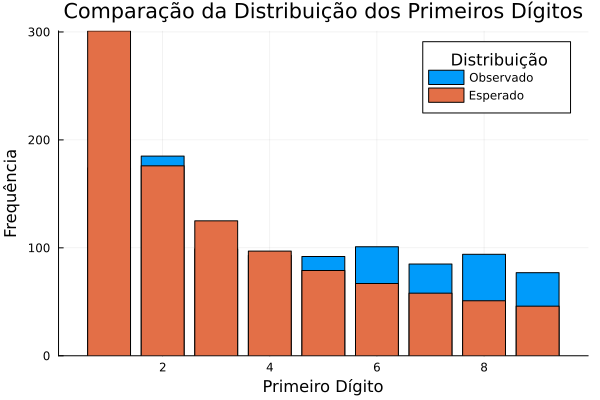

In [57]:
# Gráfico de barras para comparação
bar(results.Digit, 
    [results.Observed results.Expected], 
    label = ["Observado" "Esperado"],
    title = "Comparação da Distribuição dos Primeiros Dígitos",
    xlabel = "Primeiro Dígito",
    ylabel = "Frequência",
    legend = :topright,
    legendtitle = "Distribuição",
    grid = true)

## História
---
As primeiras observações a respeito deste fenômeno foram feitas pelo astrônomo Simon Newcomb, por volta de 1881, ao notar  que as primeiras páginas de livros de logaritmo, utilizados na época para realizar cálculos logarítmicos, eram muito mais utilizadas do que as últimas páginas. Isso o levou a propor que, em qualquer lista de números tirados de um conjunto aleatório, o conjunto de números que começam com ‘1’ tende a ser maior. Em seus estudos, Newcomb sugere que a probabilidade de um único número N ser o primeiro dígito de um número era igual a $log(N+1) - log(N)$.

O fenômeno foi esquecido por um tempo até ser redescoberto pelo físico Frank Benford, por volta de 1938. Frank Benford coletou dezena de milhares de números de 20 domínios diferentes, dentre eles estavam áreas de superfície de 335 rios, tamanho de populações de 3259 locais dos EUA, 104 constantes físicas, 1800 pesos moleculares, 5000 entradas de um livro matemático, 308 números contidos em uma edição da Reader’s Digest, os 342 primeiros endereços listados na American Men of Science e 418 taxas de mortalidade. O total de números utilizados no paper chegou a 20.229   e todos seguiam a mesma distribuição. A descoberta deste padrão foi nomeada posteriormente de Benford.

Em 1995, o matemático Theodore P. Hill conseguiu provar o fenômeno por trás das distribuições.